### Welcome to the cleaning experimentation notebook

Welcome to the cleaning experimentation notebook, this book is no long being worked on, but is a document to our approach.


In [1]:
# importing all the libraries i will need
import numpy as np
import pandas as pd
import sklearn as sl
import folium as fl
import csv
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# loading in the dataset for the sample
# updated to load the filtered dataset
try:
    dataset = pd.read_csv('datasets/crimedata2016.csv')
except:
    dataset = pd.read_csv('datasets/Chicago_Crimes_2012_to_2017.csv')
dataset.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,FBI Code,X Coordinate,Y Coordinate,Year,Location,Latitude,Longitude
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,08B,1154907.0,1893681.0,2016,"[41.864073157, -87.706818608]",41.864073,-87.706819
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,08B,1183066.0,1864330.0,2016,"[41.782921527, -87.60436317]",41.782922,-87.604363
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,24,1140789.0,1904819.0,2016,"[41.894908283, -87.758371958]",41.894908,-87.758372
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,1532,08B,1143223.0,1901475.0,2016,"[41.885686845, -87.749515983]",41.885687,-87.749516
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,06,1139890.0,1901675.0,2016,"[41.886297242, -87.761750709]",41.886297,-87.761751


In [3]:
# dropping all information not needed by our program.
try:
    dataset = dataset.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR', 'Updated On', 'Latitude', 
            'Longitude', 'District', 'Ward', 'Community Area'], axis=1)
except:
    pass

# limiting our data to just a year.
dataset_train = dataset[dataset['Year'] == 2016]
dataset_test = dataset[dataset['Year'] == 2015]
dataset

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,FBI Code,X Coordinate,Y Coordinate,Year,Location,Latitude,Longitude
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,08B,1154907.0,1893681.0,2016,"[41.864073157, -87.706818608]",41.864073,-87.706819
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,08B,1183066.0,1864330.0,2016,"[41.782921527, -87.60436317]",41.782922,-87.604363
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,24,1140789.0,1904819.0,2016,"[41.894908283, -87.758371958]",41.894908,-87.758372
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,1532,08B,1143223.0,1901475.0,2016,"[41.885686845, -87.749515983]",41.885687,-87.749516
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,06,1139890.0,1901675.0,2016,"[41.886297242, -87.761750709]",41.886297,-87.761751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250727,05/03/2016 11:33:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,08B,1159105.0,1888300.0,2016,"[41.849222028, -87.69155551]",41.849222,-87.691556
250728,05/03/2016 11:30:00 PM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,14,1175230.0,1856183.0,2016,"[41.760743949, -87.63333531]",41.760744,-87.633335
250729,05/03/2016 12:15:00 AM,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,04B,1161027.0,1862810.0,2016,"[41.779234743, -87.685207125]",41.779235,-87.685207
250730,05/03/2016 09:07:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,08B,1197261.0,1850727.0,2016,"[41.745251975, -87.552773464]",41.745252,-87.552773


In [4]:
# script to save all the data, for import and analysis later
# NOT NEEDED TO BE RUN ANYMORE

f = open('datasets/crimedata2016.csv', 'w')
writer = csv.writer(f)
writer.writerow(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
                'Domestic', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
                'Location', 'Latitude', 'Longitude'])
for i in range(len(dataset_train)):
    writer.writerow(dataset_train.iloc[i])
f.close()
# f = open('datasets/crimedata2017.csv', 'w')
# writer = csv.writer(f)
# writer.writerow(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
#                 'Domestic', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
#                 'Location'])
# for i in range(len(dataset_test)):
#     writer.writerow(dataset_test.iloc[i])
# f.close()

In [5]:
basicCrime = list(set(dataset_train['Primary Type']))

In [6]:
# convert location into lat, long lists.
locset = []
loclat = []
loclong = []
dataset_train = dataset_train.dropna()
for i in dataset_train['Location']:
    locset.append([float(i[0]), float(i[1])])
    loclat.append(float(i[0]))
    loclong.append(float(i[1]))

dataset_train['Location'] = locset
dataset_train['Latitude'] = loclat
dataset_train['Longitude'] = loclong
dataset_train.head()

ValueError: could not convert string to float: '['

WORK FOR SHOWCASE
- cleaning all datasets to standardise them
- adding support for multiple cities in our project
- figuring out how to plot everything

In [65]:
# city number 2, LOS ANGELES
df = pd.read_csv('datasets/Los AngelesRAW.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [66]:
try:
    df = df.drop(['DR_NO', 'Date Rptd', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3',
       'Crm Cd 4', 'Cross Street'], axis='columns')
except:
    pass
df.head()

,DATE OCC,TIME OCC,Crm Cd Desc,Mocodes,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,0444 0913,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,BATTERY - SIMPLE ASSAULT,0416 1822 1414,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,1230,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630
3,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [67]:
years = pd.Series([i[6:10] for i in df['DATE OCC']])
fldf = df.loc[(years == '2020')].reset_index()
cleandf = fldf.drop(['index'], axis=1)
cleandf.head()
print(len(df) - len(cleandf))

79812


In [68]:
cleandf['TIME OCC'].describe()

count    196772.000000
mean       1354.733448
std         649.069994
min           1.000000
25%         920.000000
50%        1434.000000
75%        1900.000000
max        2359.000000
Name: TIME OCC, dtype: float64

In [69]:
# converting time to standard military time format,
# so i can convert it to datetime objects and 
# save it in a standard format
rawtime = cleandf['TIME OCC'].tolist()
cleantime = []
for i in rawtime:
    j = str(i)
    if (len(j) == 1):
        cleantime.append('000' + j)
    elif (len(j) == 2):
        cleantime.append('00' + j)
    elif (len(j) == 3):
        cleantime.append('0' + j)
    else:
        cleantime.append(j)
cleandf['TIME OCC'] = cleantime
cleandf.head()

,DATE OCC,TIME OCC,Crm Cd Desc,Mocodes,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,0444 0913,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,0330,BATTERY - SIMPLE ASSAULT,0416 1822 1414,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,1230,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630
3,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,0415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [70]:
import datetime as dt
timelist = []
for i in range(len(cleandf)):
    datetime_object = dt.datetime.strptime(cleandf['TIME OCC'][i], '%H%M')
    timelist.append(datetime_object)
cleandf['Time'] = timelist
cleandf.head()

,DATE OCC,TIME OCC,Crm Cd Desc,Mocodes,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Time
0,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,0444 0913,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1900-01-01 22:30:00
1,01/01/2020 12:00:00 AM,0330,BATTERY - SIMPLE ASSAULT,0416 1822 1414,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1900-01-01 03:30:00
2,09/16/2020 12:00:00 AM,1230,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630,1900-01-01 12:30:00
3,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1900-01-01 17:30:00
4,01/01/2020 12:00:00 AM,0415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1900-01-01 04:15:00


In [90]:
finaldf = cleandf.rename(columns={'LAT' : 'Latitude', 'LON' : 'Longitude', 'Crm Cd 1' : 'type'})
finaldf.head()

,DATE OCC,TIME OCC,Crm Cd Desc,Mocodes,Status,Status Desc,type,LOCATION,Latitude,Longitude,Time
0,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,0444 0913,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1900-01-01 22:30:00
1,01/01/2020 12:00:00 AM,0330,BATTERY - SIMPLE ASSAULT,0416 1822 1414,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1900-01-01 03:30:00
2,09/16/2020 12:00:00 AM,1230,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630,1900-01-01 12:30:00
3,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1900-01-01 17:30:00
4,01/01/2020 12:00:00 AM,0415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1900-01-01 04:15:00


In [92]:
# making the 'type' column using some a BAD method.
# someone needs to come up with something much better.
finaldf.fillna(0, inplace=True)
primList = {'NON CRIMINAL': 0, 'NON CRIMINAL SUBJECT SPECIFIED': 0,
            'INTIMIDATION': 1, 'OBSCENITY': 1, 'OTHER OFFENSE': 1, 'PUBLIC INDECENCY': 1,
            'LIQUOR LAW VIOLATION': 2, 'PUBLIC PEACE VIOLATION': 2, 'CONCEALED CARRY LICENSE VIOLATION': 2,
            'PROSTITUTION': 3, 'GAMBLING': 3, 'INTERFERENCE WITH PUBLIC OFFICER': 3, 'STALKING': 3,
            'ARSON': 6, 'BURGLARY': 5, 'BATTERY': 2, 'ROBBERY': 5, 'SEX OFFENSE': 5, 'ASSAULT': 3,
            'THEFT': 4, 'DECEPTIVE PRACTICE': 5, 'CRIMINAL TRESPASS': 4, 'CRIMINAL DAMAGE': 4, 'WEAPONS VIOLATION' : 5,
            'MOTOR VEHICLE THEFT': 5, 'OFFENSE INVOLVING CHILDREN': 5, 'KIDNAPPING': 5, 'NARCOTICS': 5,
            'OTHER NARCOTIC VIOLATION' : 4,'HUMAN TRAFFICKING' : 6,'CRIM SEXUAL ASSAULT' : 6, 'HOMICIDE' : 6}
finaldf.drop(['TIME OCC', 'DATE OCC'], axis=1, inplace=True)

In [93]:
# save the file as it is for now, maybe needs to be worked on later.
f = open('datasets/Los AngelesSet.csv', 'w')
writer = csv.writer(f)
writer.writerow(['Crm Cd Desc', 'Mocodes', 'Status', 'Status Desc', 
                'type', 'LOCATION', 'Latitude', 'Longitude', 'Time'])
for i in range(len(finaldf)):
    writer.writerow(finaldf.iloc[i])
f.close()

City number three: New York City

In [3]:
df = pd.read_csv('datasets/New York CityRAW.csv', dtype=str)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.82884833,-73.91666114,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991,193406,40.69733814,-73.78455674,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463,231690,40.80260661,-73.94505191,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183,177862,40.65454944,-73.72633879,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


In [16]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [56]:
from collections import Counter
freq = Counter([str(i)[-4:] for i in cleandf['CMPLNT_FR_DT']])
freq

Counter({'2015': 468576,
         '2013': 86162,
         '2009': 242,
         '2014': 490363,
         '2011': 578,
         '2004': 107,
         '2012': 1229,
         '1992': 8,
         '1969': 1,
         '2010': 357,
         '1979': 3,
         '2008': 218,
         '2006': 139,
         '2007': 135,
         '2005': 100,
         '2001': 49,
         '1982': 2,
         '1015': 7,
         '1995': 8,
         '1993': 8,
         '1965': 2,
         '2000': 25,
         '2002': 43,
         '1990': 4,
         '1999': 13,
         '1996': 7,
         '2003': 46,
         '1987': 2,
         '1975': 4,
         '1989': 4,
         '1915': 7,
         '1986': 4,
         'nan': 65,
         '1981': 1,
         '1950': 1,
         '1998': 4,
         '1978': 1,
         '1997': 13,
         '1910': 1,
         '1991': 3,
         '1955': 2,
         '1914': 10,
         '1958': 1,
         '1994': 3,
         '1974': 4,
         '1977': 1,
         '1980': 1,
         '1930': 1,


In [68]:
cleandf = df.drop([ 'CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 
                    'RPT_DT', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 
                    'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD', 
                    'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'HADEVELOPT', 
                    'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon'], axis=1)
cleandf.head(10)

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude
0,12/31/2015,23:45:00,113,FORGERY,FELONY,BAR/NIGHT CLUB,40.82884833,-73.91666114
1,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,40.69733814,-73.78455674
2,12/31/2015,23:30:00,117,DANGEROUS DRUGS,FELONY,OTHER,40.80260661,-73.94505191
3,12/31/2015,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,RESIDENCE-HOUSE,40.65454944,-73.72633879
4,12/31/2015,23:25:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,OTHER,40.7380024,-73.98789129
5,12/31/2015,23:18:00,106,FELONY ASSAULT,FELONY,DRUG STORE,40.66502269,-73.95711076
6,12/31/2015,23:15:00,235,DANGEROUS DRUGS,MISDEMEANOR,STREET,40.7202,-73.98873508
7,12/31/2015,23:15:00,118,DANGEROUS WEAPONS,FELONY,STREET,40.84570715,-73.91039803
8,12/31/2015,23:15:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,RESIDENCE - APT. HOUSE,40.85671129,-73.89189996
9,12/31/2015,23:10:00,341,PETIT LARCENY,MISDEMEANOR,DRUG STORE,40.76561769,-73.96362342


In [76]:
cleandf['Year'] = [str(i)[-4:] for i in cleandf['CMPLNT_FR_DT']]
cleandf = cleandf.loc[cleandf['Year'] == '2014']
cleandf.reset_index(inplace=True)

In [77]:
cleandf.drop(['index'], axis=1, inplace=True)

In [78]:
import datetime as dt
timelist = []
for i in range(len(cleandf)):
    datetime_object = dt.datetime.strptime(cleandf['CMPLNT_FR_TM'][i], '%H:%M:%S')
    timelist.append(datetime_object)
cleandf['Time'] = timelist

In [79]:
cleandf.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'Year'], axis=1, inplace=True)

In [83]:
cleandf.rename({'KY_CD' : 'type'}, axis=1, inplace=True)

In [87]:
cleandf.dropna(inplace=True)
cleandf

,type,OFNS_DESC,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,Time
0,109,GRAND LARCENY,FELONY,STREET,40.77162029,-73.99045573,1900-01-01 20:51:00
1,351,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,STREET,40.8123169,-73.8963613,1900-01-01 00:01:00
2,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,RESTAURANT/DINER,40.72359521,-73.98820056,1900-01-01 23:30:00
3,113,FORGERY,FELONY,RESIDENCE - APT. HOUSE,40.7161164,-73.81190457,1900-01-01 00:01:00
4,109,GRAND LARCENY,FELONY,RESIDENCE - APT. HOUSE,40.80648015,-73.9602056,1900-01-01 13:00:00
...,...,...,...,...,...,...,...
490358,351,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,RESIDENCE - APT. HOUSE,40.65888444,-73.92357374,1900-01-01 00:01:00
490359,355,OFFENSES AGAINST THE PERSON,MISDEMEANOR,STREET,40.86555799,-73.86156293,1900-01-01 00:00:00
490360,351,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,RESIDENCE-HOUSE,40.68105008,-73.91410572,1900-01-01 00:00:00
490361,341,PETIT LARCENY,MISDEMEANOR,DEPARTMENT STORE,40.60170039,-74.19280679,1900-01-01 00:00:00


In [88]:
# saving all needed data for this city.
f = open('datasets/New York CitySet.csv', 'w')
writer = csv.writer(f)
writer.writerow(list(cleandf.columns))
for i in range(len(cleandf)):
    writer.writerow(cleandf.iloc[i])
f.close()

THE LAST CITY: SAN FRANCISCO

we're in the home stretch now, dobby

In [89]:
df = pd.read_csv('datasets/San FranciscoRAW.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13-05-2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13-05-2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13-05-2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13-05-2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13-05-2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [103]:
freq1 = Counter([i[6:10] for i in df['Dates']])
freq2 = Counter(df['Category'])
print('', freq1, '\n', freq2)

 Counter({'2013': 75606, '2014': 74766, '2003': 73902, '2004': 73422, '2012': 71731, '2005': 70779, '2008': 70174, '2006': 69909, '2009': 69000, '2007': 68015, '2011': 66619, '2010': 66542, '2015': 27584}) 
 Counter({'LARCENY/THEFT': 174900, 'OTHER OFFENSES': 126182, 'NON-CRIMINAL': 92304, 'ASSAULT': 76876, 'DRUG/NARCOTIC': 53971, 'VEHICLE THEFT': 53781, 'VANDALISM': 44725, 'WARRANTS': 42214, 'BURGLARY': 36755, 'SUSPICIOUS OCC': 31414, 'MISSING PERSON': 25989, 'ROBBERY': 23000, 'FRAUD': 16679, 'FORGERY/COUNTERFEITING': 10609, 'SECONDARY CODES': 9985, 'WEAPON LAWS': 8555, 'PROSTITUTION': 7484, 'TRESPASS': 7326, 'STOLEN PROPERTY': 4540, 'SEX OFFENSES FORCIBLE': 4388, 'DISORDERLY CONDUCT': 4320, 'DRUNKENNESS': 4280, 'RECOVERED VEHICLE': 3138, 'KIDNAPPING': 2341, 'DRIVING UNDER THE INFLUENCE': 2268, 'RUNAWAY': 1946, 'LIQUOR LAWS': 1903, 'ARSON': 1513, 'LOITERING': 1225, 'EMBEZZLEMENT': 1166, 'SUICIDE': 508, 'FAMILY OFFENSES': 491, 'BAD CHECKS': 406, 'BRIBERY': 289, 'EXTORTION': 256, 'SEX O

In [115]:
df['Year'] = [i[6:10] for i in df['Dates']]
yrdf = df.loc[(df['Year'] == '2013') | (df['Year'] == '2014')]
yrdf.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year
27584,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Sunday,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,2014
27585,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037,2014
27586,28-12-2014 23:30,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,2014
27587,28-12-2014 23:30,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421701,37.773641,2014
27588,28-12-2014 23:30,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421701,37.773641,2014


In [118]:
cleandf = yrdf.drop(['DayOfWeek', 'PdDistrict', 'Year', 'Address'], axis=1)
cleandf.head()

,Dates,Category,Descript,Resolution,X,Y
27584,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT PICKPOCKET,NONE,-122.435563,37.760801
27585,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,-122.433575,37.800037
27586,28-12-2014 23:30,VEHICLE THEFT,STOLEN AUTOMOBILE,NONE,-122.412777,37.786834
27587,28-12-2014 23:30,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,"ARREST, BOOKED",-122.421701,37.773641
27588,28-12-2014 23:30,ASSAULT,INFLICT INJURY ON COHABITEE,"ARREST, BOOKED",-122.421701,37.773641


In [119]:
cleandf.reset_index(inplace=True)
cleandf.drop('index', axis=1, inplace=True)

In [122]:
cleandf.head()

,Dates,Category,Descript,Resolution,X,Y
0,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT PICKPOCKET,NONE,-122.435563,37.760801
1,28-12-2014 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,-122.433575,37.800037
2,28-12-2014 23:30,VEHICLE THEFT,STOLEN AUTOMOBILE,NONE,-122.412777,37.786834
3,28-12-2014 23:30,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,"ARREST, BOOKED",-122.421701,37.773641
4,28-12-2014 23:30,ASSAULT,INFLICT INJURY ON COHABITEE,"ARREST, BOOKED",-122.421701,37.773641


In [134]:
import datetime as dt
timelist = []
for i in range(len(cleandf)):
    datetime_object = dt.datetime.strptime(cleandf['Dates'][i][-5:], '%H:%M')
    timelist.append(datetime_object)
cleandf['Time'] = timelist
cleandf.rename({'X' : 'Longitude', 'Y' : 'Latitude'}, axis=1, inplace=True)
cleandf['Longitude'], cleandf['Latitude'] = cleandf['Latitude'], cleandf['Longitude']
cleandf.rename({'Latitude' : 'Longitude', 'Longitude' : 'Latitude'}, axis=1, inplace=True)
finaldf = cleandf.drop('Dates', axis=1)
finaldf.head()

,Category,Descript,Resolution,Latitude,Longitude,Time
0,LARCENY/THEFT,GRAND THEFT PICKPOCKET,NONE,37.760801,-122.435563,1900-01-01 23:30:00
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,37.800037,-122.433575,1900-01-01 23:30:00
2,VEHICLE THEFT,STOLEN AUTOMOBILE,NONE,37.786834,-122.412777,1900-01-01 23:30:00
3,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,"ARREST, BOOKED",37.773641,-122.421701,1900-01-01 23:30:00
4,ASSAULT,INFLICT INJURY ON COHABITEE,"ARREST, BOOKED",37.773641,-122.421701,1900-01-01 23:30:00


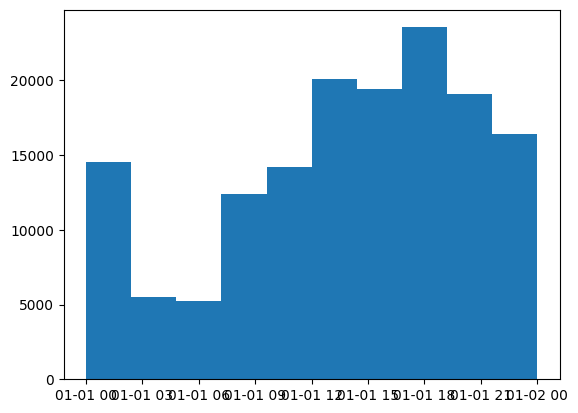

In [135]:
plt.hist(finaldf['Time'])
plt.show()

In [138]:
# adding a temporary type column with full of ones or smth lmao
# FIX THIS LATER
finaldf['type'] = np.ones(len(finaldf))
finaldf.head()

,Category,Descript,Resolution,Latitude,Longitude,Time,type
0,LARCENY/THEFT,GRAND THEFT PICKPOCKET,NONE,37.760801,-122.435563,1900-01-01 23:30:00,1.0
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,37.800037,-122.433575,1900-01-01 23:30:00,1.0
2,VEHICLE THEFT,STOLEN AUTOMOBILE,NONE,37.786834,-122.412777,1900-01-01 23:30:00,1.0
3,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,"ARREST, BOOKED",37.773641,-122.421701,1900-01-01 23:30:00,1.0
4,ASSAULT,INFLICT INJURY ON COHABITEE,"ARREST, BOOKED",37.773641,-122.421701,1900-01-01 23:30:00,1.0


In [139]:
# saving all needed data for this city.
f = open('datasets/San FranciscoSet.csv', 'w')
writer = csv.writer(f)
writer.writerow(list(finaldf.columns))
for i in range(len(finaldf)):
    writer.writerow(finaldf.iloc[i])
f.close()